In [1558]:
# Exploratory Data Analyses and Data Visualization of 2016 ebay Car Sales in Germany 



> # Exploratory Data Analyses and Data Visualization of 2016 ebay Car Sales in Germany Using Python and Business Inteligence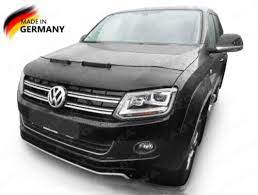
[Source of Picture](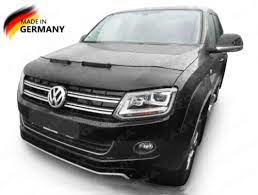)

## Mid-term-Project For the March 2023 Ironhack, Berlin By Evans and Festus 
## Dataset: Auto Sales ebay Germany Random 50k!

##  Table of Contents
1. [Description of the dataset](#2)

1. [Goals of the project¶](#3)

2. [Data Gathering and Methodology](#4)
   
3. [Data Analytics and Conclusion](#5) 
   
4. [References](#6)

#  Description of the dataset
The dataset used to complete this project was scraped in 2016 from ebay-Kleinanzeigan (Germany).
The data was made available publicly on the Kaggle by the user 'orgesleka'. 

The dataset contains seventeen columns with over 37 thousand rows of private used car listings for sale; 
the column headings and their descriptions are listed here:

**date_crawled:** When an ad was first crawled; all field-values are taken from this date.
name: Name of the car.

**price_EUR:** Listed price for the car.

**ab_test:** Whether the listing is included in an A/B test.

**vehicle_type:** The vehicle type.

**registration_year:** The year the car was first registered.

**transmission:** The transmission type.

**power_ps:** The power of the car in PS (PferdStarkeis, similar to horse power).

**model:** Car model name.

**odometer_km:** approximate kilometers the car has driven.

**registration_month:** The month the car was first registered.

**fuel_type:** Vehicle fuel type.

**brand:** Car brand.

**unrepaired_damage:** If the car has damage which is not yet repaired.

**date_created:** The date the eBay listing was created.

**postal_code:** The postal code for the location of the vehicle.

**last_seen_online:** When the crawler saw this ad last online.


# Goals of the project
## **Do data cleaning:**
    - identify and remove where applicable the outliers, missing data, duplicates, columns to drop
    - decide on the interesting features to keep
## **Carry out EDA and provide dataset summary:** 
    - Mean prices
    - max prices 
    - mode i.e most frequent car model
## **Investigate the underlying patterns and data structure:** 
    - Commonly listed brands
    - distribution of brands?
    - price variation between: 
        - relatively newer cars and older cars
        - fuel type
        - transmission type
        - car brands
        - mileage of the car
        - unrepaired_damage
    - correlations between the numerical features:
        - Price
        - power_ps 
        - mileage in Km
## **Assess the impact of Ab Testing:**
    - Viewership of the cars
## **Business Inteligence - Build a Tableau Dashboard:**
    - Are their any meaningful KPIs?
    - show impact of AB testing of such KPI.
    - comparing the transmission types, fuel types brands and prices
    - filter by top 3 model, brand, fuel types etc 
    - show an important insight/pattern about the sale of cars
    - design a clean and well readable charts that have titles, labels etc. 
## **Reveal the bigger picture:** 
     - Relate the data to the opportunity for sellers and buyers.
     - Recommnedation about the AB testing whether to launch or not to launch it.
     - Conclusion.

# Data Gathering and Methodology

1. Python libraries below will be used for EDA and for data wrangling. 
1. Dataset is publicly available in [kaggle](https://www.kaggle.com/datasets/shaunoilund/auto-sales-ebay-germany-random-50k-cleaned) in the format comma-separated value (CSV) file, a tabular format contained in [a zipped file](https://www.kaggle.com/datasets/shaunoilund/auto-sales-ebay-germany-random-50k-cleaned/download?datasetVersionNumber=1)

1. Tableau will be used for visualizations and Dashboard design. 



## Loading the libraries and modules

In [1559]:
# import libraries 
# data cleaning
import pandas as pd
import numpy as np
import datetime as dt
#import os
#from scipy import stats

#from requests.auth import HTTPBasicAuth
#from zipfile import ZipFile
#import io

#data visualization
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

#visualazation libraries
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
Set notebook mode to work in offline
pyo.init_notebook_mode()




SyntaxError: invalid syntax (3545224310.py, line 22)

## Loading Data


In [ ]:
#dataset
#df = pd.read_csv('https://www.kaggle.com/datasets/shaunoilund/auto-sales-ebay-germany-random-50k-cleaned/download?datasetVersionNumber=1.zip',compression='zip')
#https://www.kaggle.com/datasets/tjelailah/ebay-car-sales-data
#https://www.kaggle.com/datasets/tjelailah/ebay-car-sales-data/download?datasetVersionNumber=1
#https://www.kaggle.com/datasets/sijovm/used-cars-data-from-ebay-kleinanzeigen
#df = pd.read_csv('autos_random_50k_cleaned.csv')
#df = pd.read_csv('autos_random_50k.csv', encoding = 'ISO-8859-1')
df = pd.read_csv('autos.csv', encoding = 'ISO-8859-1')
#df = pd.read_csv("https://www.kaggle.com/datasets/sijovm/used-cars-data-from-ebay-kleinanzeigen.csv", encoding = 'ISO-8859-1')
#print(df)

df

<a id = "3"></a><br>

## Data Wrangling: Cleaning

1. We drop the first column **'unnamed'**:
1. Standardize the column names e.g price should all be in lower case
1. Convert the German words to english e.g transmission column
1. Remove Nan values
1. Remove duplicates
1. Review the regsitration year and prices of vehicles


  

### Exploring the data to know what to clean

In [ ]:
#Drop the first column
#df=df.drop(df.columns[0], axis=1)
#df

In [ ]:
# change to lower case
df.columns = df.columns.str.lower()
df

In [ ]:
##Change column lastSeen and dateCreated to date or date time
# convert the 'Date' column to datetime format
df['lastseen']= pd.to_datetime(df['lastseen'])
df['datecreated']= pd.to_datetime(df['datecreated'])
df["viewer_index"]=(df["lastseen"]) - (df["datecreated"])
df

In [ ]:
df.columns

In [ ]:
#Rename columns with list
column_names = ['date_crawled', 'name', 'seller', 'offer_type', 'price_eur', 'ab_test',
       'vehicle_type', 'year_registration', 'transmission', 'power_hp', 'model',
       'mileage_km', 'month_registration', 'fuel_type', 'brand',
       'unrepaired_damage', 'date_created', 'number_pictures', 'postal_code',
       'last_seen','viewer_index']
df.columns = column_names
df

In [ ]:
#drop duplicates
df = df.drop_duplicates()
df


In [ ]:
df['transmission'].unique()

In [ ]:
#drop missing values
df=df.dropna(subset=['transmission'])
df

In [ ]:
df['transmission'].unique()

In [ ]:
#unrepaired_damage
df['unrepaired_damage'].unique()

In [ ]:
#drop missing values
df=df.dropna(subset=['unrepaired_damage'])
df

In [ ]:
df['date_crawled'].min()#no change

In [ ]:
df['date_crawled'].max()#no change

In [ ]:
df['date_crawled'].mode()#no change

In [ ]:
df['ab_test'].unique()#No changes

In [ ]:
df['vehicle_type'].unique()#['cabrio', 'kleinwagen', 'suv', 'kombi', 'limousine', 'coupe','bus', 'andere', 'Unknown']

In [ ]:
#df['registration_year'].unique()#
df['year_registration'].unique()

In [ ]:
df['year_registration'].min()

In [ ]:
df['year_registration'].max()

In [ ]:
df['year_registration'].mode()

In [ ]:
df['year_registration'].mean()

In [ ]:
df['power_hp'].unique()

In [ ]:
df['power_hp'].max()

In [ ]:
df['power_hp'].min()

In [ ]:
df['power_hp'].mean()

In [ ]:
df['model'].unique()

In [ ]:
#drop missing values
df=df.dropna(subset=['model'])
df

In [ ]:
df['model'].mode()

In [ ]:
df['mileage_km'].unique()

In [1560]:
df['mileage_km'].max()

150000

In [1561]:
df['mileage_km'].min()

5000

In [1562]:
df['mileage_km'].mean()

129288.0521018354

In [1563]:
df['month_registration'].unique()

array([ 5,  2,  8,  7,  1, 11, 12,  9,  3, 10,  4,  6,  0])

In [1564]:
df['month_registration'].mode()

0    3
Name: month_registration, dtype: int64

In [1565]:
df['fuel_type'].unique()

array(['petrol', 'diesel', 'elektric', 'lpg', 'cng', 'other', 'hybrid'],
      dtype=object)

### Change German words to English

In [1566]:
#Transmission - Standardize - translate German to English
df.loc[df['transmission'].str.contains('manuell'),"transmission"] = 'manual'
df.loc[df['transmission'].str.contains('automatik'),"transmission"] = 'automatic'
#df.loc[df['transmission'].str.contains('Unknown'),"transmission"] = 'unknown'
df

,date_crawled,name,seller,offer_type,price_eur,ab_test,vehicle_type,year_registration,transmission,model,mileage_km,month_registration,fuel_type,brand,unrepaired_damage,date_created,postal_code,last_seen,viewer_index
158436,2016-03-07 13:45:44,Mercedes_Benz_SLK_200_Kompressor_Airscraf/Lede...,private,offer,14650,control,cabrio,2007,manual,slk,90000,5,petrol,mercedes_benz,no,2016-03-07,54338,2016-03-09 14:16:44,2 days 14:16:44
162670,2016-03-27 17:49:03,Ford_Mondeo_Turnier_2.2_TDCi_Titanium_S,private,offer,14650,test,kombi,2012,manual,mondeo,125000,2,diesel,ford,no,2016-03-27,66359,2016-04-05 14:16:06,9 days 14:16:06
282301,2016-03-21 11:55:50,Skoda_Octavia_Combi_2.0_TDI_RS_schwarz_mit_Sta...,private,offer,14650,control,kombi,2010,manual,octavia,100000,8,diesel,skoda,no,2016-03-21,57392,2016-04-06 06:45:38,16 days 06:45:38
153753,2016-03-13 20:06:59,BMW_750i_Voll_F01,private,offer,14650,test,limousine,2009,automatic,7er,150000,7,petrol,bmw,no,2016-03-13,60327,2016-03-14 06:31:22,1 days 06:31:22
305026,2016-03-18 20:43:26,Mercedes_Benz_E_320_CDI_7G_TRONIC_Sportpaket,private,offer,14650,test,limousine,2007,automatic,e_klasse,150000,1,diesel,mercedes_benz,no,2016-03-18,42107,2016-03-22 11:16:58,4 days 11:16:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322874,2016-03-12 20:40:19,Audi_100_Avant_2.0_E,private,offer,510,test,kombi,1991,manual,100,150000,12,petrol,audi,no,2016-03-12,24943,2016-04-05 13:45:13,24 days 13:45:13
251647,2016-03-15 21:55:08,Volkswagen_Vento_1.8_CL,private,offer,510,control,limousine,1995,manual,andere,150000,12,petrol,volkswagen,yes,2016-03-15,99867,2016-04-07 07:17:33,23 days 07:17:33
340568,2016-03-13 16:48:18,escort_16.v_mit_90_ps_faehrt_klasse,private,offer,510,test,limousine,1997,manual,escort,100000,4,petrol,ford,no,2016-03-13,76456,2016-03-17 13:45:40,4 days 13:45:40
150686,2016-03-27 19:56:49,Opel_Astra_Limousine_Garagenwagen_ohne_jeglich...,private,offer,501,control,limousine,1993,automatic,astra,125000,3,petrol,opel,no,2016-03-27,1640,2016-03-27 19:56:49,0 days 19:56:49


In [1567]:
#unrepaired_damage: Standardize - translate German to English
df.loc[df['unrepaired_damage'].str.contains('nein'),"unrepaired_damage"] = 'no'
df.loc[df['unrepaired_damage'].str.contains('ja'),"unrepaired_damage"] = 'yes'
#df.loc[df['unrepaired_damage'].str.contains('nan'),"unrepaired_damage"] = 'unknown'
df

,date_crawled,name,seller,offer_type,price_eur,ab_test,vehicle_type,year_registration,transmission,model,mileage_km,month_registration,fuel_type,brand,unrepaired_damage,date_created,postal_code,last_seen,viewer_index
158436,2016-03-07 13:45:44,Mercedes_Benz_SLK_200_Kompressor_Airscraf/Lede...,private,offer,14650,control,cabrio,2007,manual,slk,90000,5,petrol,mercedes_benz,no,2016-03-07,54338,2016-03-09 14:16:44,2 days 14:16:44
162670,2016-03-27 17:49:03,Ford_Mondeo_Turnier_2.2_TDCi_Titanium_S,private,offer,14650,test,kombi,2012,manual,mondeo,125000,2,diesel,ford,no,2016-03-27,66359,2016-04-05 14:16:06,9 days 14:16:06
282301,2016-03-21 11:55:50,Skoda_Octavia_Combi_2.0_TDI_RS_schwarz_mit_Sta...,private,offer,14650,control,kombi,2010,manual,octavia,100000,8,diesel,skoda,no,2016-03-21,57392,2016-04-06 06:45:38,16 days 06:45:38
153753,2016-03-13 20:06:59,BMW_750i_Voll_F01,private,offer,14650,test,limousine,2009,automatic,7er,150000,7,petrol,bmw,no,2016-03-13,60327,2016-03-14 06:31:22,1 days 06:31:22
305026,2016-03-18 20:43:26,Mercedes_Benz_E_320_CDI_7G_TRONIC_Sportpaket,private,offer,14650,test,limousine,2007,automatic,e_klasse,150000,1,diesel,mercedes_benz,no,2016-03-18,42107,2016-03-22 11:16:58,4 days 11:16:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322874,2016-03-12 20:40:19,Audi_100_Avant_2.0_E,private,offer,510,test,kombi,1991,manual,100,150000,12,petrol,audi,no,2016-03-12,24943,2016-04-05 13:45:13,24 days 13:45:13
251647,2016-03-15 21:55:08,Volkswagen_Vento_1.8_CL,private,offer,510,control,limousine,1995,manual,andere,150000,12,petrol,volkswagen,yes,2016-03-15,99867,2016-04-07 07:17:33,23 days 07:17:33
340568,2016-03-13 16:48:18,escort_16.v_mit_90_ps_faehrt_klasse,private,offer,510,test,limousine,1997,manual,escort,100000,4,petrol,ford,no,2016-03-13,76456,2016-03-17 13:45:40,4 days 13:45:40
150686,2016-03-27 19:56:49,Opel_Astra_Limousine_Garagenwagen_ohne_jeglich...,private,offer,501,control,limousine,1993,automatic,astra,125000,3,petrol,opel,no,2016-03-27,1640,2016-03-27 19:56:49,0 days 19:56:49


In [1568]:
#drop missing values
df=df.dropna(subset=['vehicle_type'])
#May be we should cjhange these NaN to unknown
df.loc[df['vehicle_type'].str.contains('andere'),"vehicle_type"] = 'other'
df.loc[df['vehicle_type'].str.contains('kleinwagen'),"vehicle_type"] = 'small_car'
df

,date_crawled,name,seller,offer_type,price_eur,ab_test,vehicle_type,year_registration,transmission,model,mileage_km,month_registration,fuel_type,brand,unrepaired_damage,date_created,postal_code,last_seen,viewer_index
158436,2016-03-07 13:45:44,Mercedes_Benz_SLK_200_Kompressor_Airscraf/Lede...,private,offer,14650,control,cabrio,2007,manual,slk,90000,5,petrol,mercedes_benz,no,2016-03-07,54338,2016-03-09 14:16:44,2 days 14:16:44
162670,2016-03-27 17:49:03,Ford_Mondeo_Turnier_2.2_TDCi_Titanium_S,private,offer,14650,test,kombi,2012,manual,mondeo,125000,2,diesel,ford,no,2016-03-27,66359,2016-04-05 14:16:06,9 days 14:16:06
282301,2016-03-21 11:55:50,Skoda_Octavia_Combi_2.0_TDI_RS_schwarz_mit_Sta...,private,offer,14650,control,kombi,2010,manual,octavia,100000,8,diesel,skoda,no,2016-03-21,57392,2016-04-06 06:45:38,16 days 06:45:38
153753,2016-03-13 20:06:59,BMW_750i_Voll_F01,private,offer,14650,test,limousine,2009,automatic,7er,150000,7,petrol,bmw,no,2016-03-13,60327,2016-03-14 06:31:22,1 days 06:31:22
305026,2016-03-18 20:43:26,Mercedes_Benz_E_320_CDI_7G_TRONIC_Sportpaket,private,offer,14650,test,limousine,2007,automatic,e_klasse,150000,1,diesel,mercedes_benz,no,2016-03-18,42107,2016-03-22 11:16:58,4 days 11:16:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322874,2016-03-12 20:40:19,Audi_100_Avant_2.0_E,private,offer,510,test,kombi,1991,manual,100,150000,12,petrol,audi,no,2016-03-12,24943,2016-04-05 13:45:13,24 days 13:45:13
251647,2016-03-15 21:55:08,Volkswagen_Vento_1.8_CL,private,offer,510,control,limousine,1995,manual,andere,150000,12,petrol,volkswagen,yes,2016-03-15,99867,2016-04-07 07:17:33,23 days 07:17:33
340568,2016-03-13 16:48:18,escort_16.v_mit_90_ps_faehrt_klasse,private,offer,510,test,limousine,1997,manual,escort,100000,4,petrol,ford,no,2016-03-13,76456,2016-03-17 13:45:40,4 days 13:45:40
150686,2016-03-27 19:56:49,Opel_Astra_Limousine_Garagenwagen_ohne_jeglich...,private,offer,501,control,limousine,1993,automatic,astra,125000,3,petrol,opel,no,2016-03-27,1640,2016-03-27 19:56:49,0 days 19:56:49


In [1569]:
#fuel type
df=df.dropna(subset=['fuel_type'])#drop missing values
df.loc[df['fuel_type'].str.contains('andere'),"fuel_type"] = 'other'
df.loc[df['fuel_type'].str.contains('benzin'),"fuel_type"] = 'petrol'
df.loc[df['fuel_type'].str.contains('elektro'),"fuel_type"] = 'elektric'


In [1570]:
df['seller'].unique()

array(['private', 'company'], dtype=object)

In [1571]:
df.loc[df["seller"].str.contains('privat'),("seller")] = 'private'
df.loc[df["seller"].str.contains('gewerblich'),("seller")] = 'company'

In [1572]:
df['offer_type'].unique()

array(['offer', 'search'], dtype=object)

In [1573]:
df.loc[df["offer_type"].str.contains('Angebot'),("offer_type")] = 'offer'
df.loc[df["offer_type"].str.contains('Gesuch'),("offer_type")] = 'search'

In [1574]:
df['offer_type'].unique()

array(['offer', 'search'], dtype=object)

In [1575]:
df['fuel_type'].unique()

array(['petrol', 'diesel', 'elektric', 'lpg', 'cng', 'other', 'hybrid'],
      dtype=object)

In [1576]:
df['brand'].unique()

array(['mercedes_benz', 'ford', 'skoda', 'bmw', 'volkswagen', 'opel',
       'mini', 'audi', 'nissan', 'toyota', 'kia', 'peugeot', 'suzuki',
       'seat', 'mitsubishi', 'honda', 'chevrolet', 'subaru', 'porsche',
       'renault', 'volvo', 'land_rover', 'alfa_romeo', 'mazda', 'citroen',
       'hyundai', 'jeep', 'chrysler', 'fiat', 'dacia', 'trabant', 'saab',
       'jaguar', 'smart', 'lancia', 'rover', 'daihatsu', 'lada', 'daewoo'],
      dtype=object)

In [1577]:
df.loc[df['brand'].str.contains('sonstige_autos'),('brand')] = 'other'


In [1578]:
df['brand'].unique()

array(['mercedes_benz', 'ford', 'skoda', 'bmw', 'volkswagen', 'opel',
       'mini', 'audi', 'nissan', 'toyota', 'kia', 'peugeot', 'suzuki',
       'seat', 'mitsubishi', 'honda', 'chevrolet', 'subaru', 'porsche',
       'renault', 'volvo', 'land_rover', 'alfa_romeo', 'mazda', 'citroen',
       'hyundai', 'jeep', 'chrysler', 'fiat', 'dacia', 'trabant', 'saab',
       'jaguar', 'smart', 'lancia', 'rover', 'daihatsu', 'lada', 'daewoo'],
      dtype=object)

In [1579]:
df['brand'].mode()

0    volkswagen
Name: brand, dtype: object

### Detecting outliers by visualization, and deciding whether to remove

In [1580]:
df

,date_crawled,name,seller,offer_type,price_eur,ab_test,vehicle_type,year_registration,transmission,model,mileage_km,month_registration,fuel_type,brand,unrepaired_damage,date_created,postal_code,last_seen,viewer_index
158436,2016-03-07 13:45:44,Mercedes_Benz_SLK_200_Kompressor_Airscraf/Lede...,private,offer,14650,control,cabrio,2007,manual,slk,90000,5,petrol,mercedes_benz,no,2016-03-07,54338,2016-03-09 14:16:44,2 days 14:16:44
162670,2016-03-27 17:49:03,Ford_Mondeo_Turnier_2.2_TDCi_Titanium_S,private,offer,14650,test,kombi,2012,manual,mondeo,125000,2,diesel,ford,no,2016-03-27,66359,2016-04-05 14:16:06,9 days 14:16:06
282301,2016-03-21 11:55:50,Skoda_Octavia_Combi_2.0_TDI_RS_schwarz_mit_Sta...,private,offer,14650,control,kombi,2010,manual,octavia,100000,8,diesel,skoda,no,2016-03-21,57392,2016-04-06 06:45:38,16 days 06:45:38
153753,2016-03-13 20:06:59,BMW_750i_Voll_F01,private,offer,14650,test,limousine,2009,automatic,7er,150000,7,petrol,bmw,no,2016-03-13,60327,2016-03-14 06:31:22,1 days 06:31:22
305026,2016-03-18 20:43:26,Mercedes_Benz_E_320_CDI_7G_TRONIC_Sportpaket,private,offer,14650,test,limousine,2007,automatic,e_klasse,150000,1,diesel,mercedes_benz,no,2016-03-18,42107,2016-03-22 11:16:58,4 days 11:16:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322874,2016-03-12 20:40:19,Audi_100_Avant_2.0_E,private,offer,510,test,kombi,1991,manual,100,150000,12,petrol,audi,no,2016-03-12,24943,2016-04-05 13:45:13,24 days 13:45:13
251647,2016-03-15 21:55:08,Volkswagen_Vento_1.8_CL,private,offer,510,control,limousine,1995,manual,andere,150000,12,petrol,volkswagen,yes,2016-03-15,99867,2016-04-07 07:17:33,23 days 07:17:33
340568,2016-03-13 16:48:18,escort_16.v_mit_90_ps_faehrt_klasse,private,offer,510,test,limousine,1997,manual,escort,100000,4,petrol,ford,no,2016-03-13,76456,2016-03-17 13:45:40,4 days 13:45:40
150686,2016-03-27 19:56:49,Opel_Astra_Limousine_Garagenwagen_ohne_jeglich...,private,offer,501,control,limousine,1993,automatic,astra,125000,3,petrol,opel,no,2016-03-27,1640,2016-03-27 19:56:49,0 days 19:56:49


/Users/evansrono/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(1988, 2018, (211125, 19))

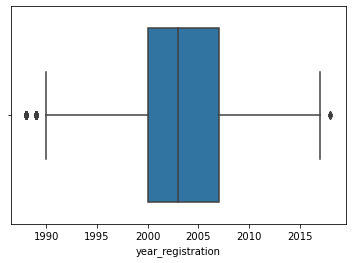

In [1581]:
#outliers
#we can decide to drop od cars registered before 1980
sns.boxplot(df['year_registration'])
df["year_registration"].min(), df["year_registration"].max(), df.shape

<AxesSubplot:xlabel='year_registration', ylabel='Count'>

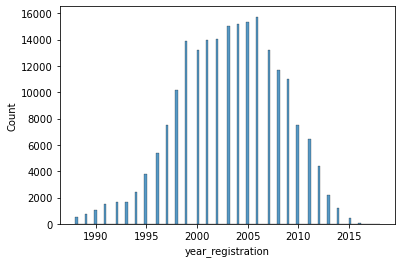

In [1582]:
sns.histplot(df["year_registration"])

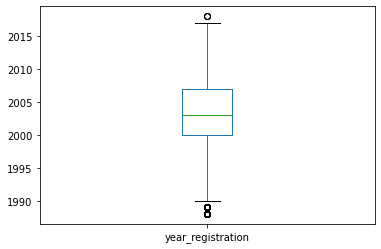

(1988, 2018, (211125, 19))

In [1583]:
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
plot_boxplot(df,"year_registration")
df["year_registration"].min(), df["year_registration"].max(), df.shape

/Users/evansrono/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(501, 14650, (211125, 19))

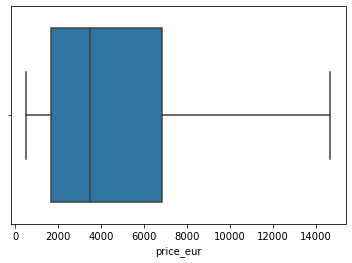

In [1584]:
#This price column is tricky. We have cars that cosr zero Euros. We have to think how to deal with this.  Evans tried interquartile range and z score methods later below
sns.boxplot(df['price_eur'])#huge impact of outliers on price_eur column
df["price_eur"].min(), df["price_eur"].max(), df.shape

<AxesSubplot:xlabel='price_eur', ylabel='Count'>

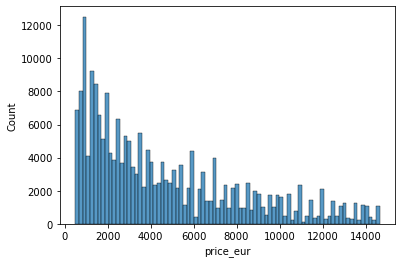

In [1585]:
sns.histplot(df["price_eur"])

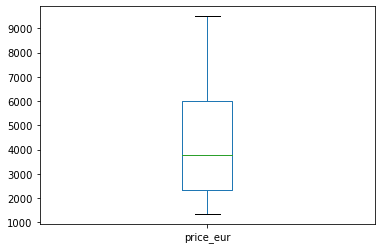

KeyError: 'power_hp'

In [1587]:
#This is the expect clean plot without outliers
def plot_boxplot(df, ft):
    dfa.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
plot_boxplot(df,"price_eur")
df["power_hp"].min(), df["power_hp"].max(), df.shape

In [1588]:
#power_PS
sns.boxplot(df['power_hp'])
df["power_hp"].min(), df["power_hp"].max(), df.shape#Huge but this column of not important to us

KeyError: 'power_hp'

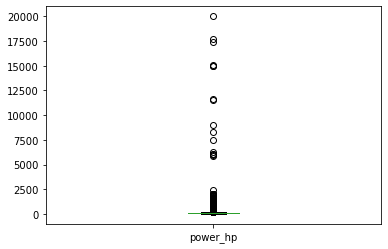

KeyError: 'power_hp'

In [1589]:
#We can drop this column because it has many outliers, which if we remove, we will impact heavily on the entire fetures of the data set
def plot_boxplot(df, ft):
    dfa.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
plot_boxplot(df,"power_hp")
df["power_hp"].min(), df["power_hp"].max(), df.shape

In [1590]:
#drop 'number_pictures' column
df.drop('number_pictures', axis=1, inplace=True)
df

KeyError: "['number_pictures'] not found in axis"

/Users/evansrono/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(5000, 150000, (211125, 19))

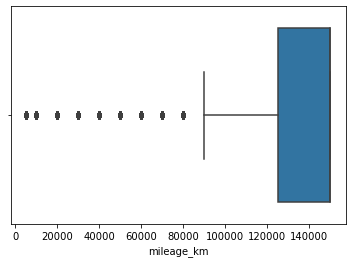

In [1591]:
#mileage_km: No need to change anything here because its obvious we have low mileages of cars
sns.boxplot(df['mileage_km'])
df["mileage_km"].min(), df["mileage_km"].max(), df.shape

<AxesSubplot:xlabel='mileage_km', ylabel='Count'>

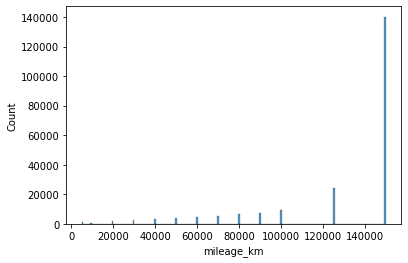

In [1592]:
sns.histplot(df["mileage_km"])

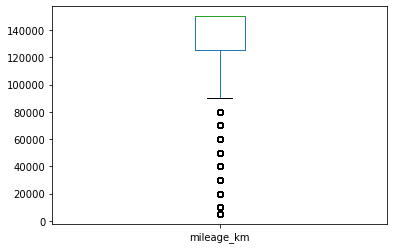

(5000, 150000, (211125, 19))

In [1593]:
#This leave this column as it is, because its reality to have cars with mileage less than 20000
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
plot_boxplot(df,"mileage_km")
df["mileage_km"].min(), df["mileage_km"].max(), df.shape

### Remove outliers in the year of Registration and price_eur columns but carefully using boxplot visualization and interquartile range or z score 

/Users/evansrono/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(1988, 2018, (211125, 19))

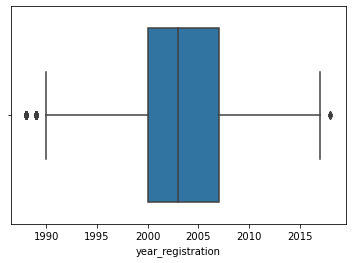

In [1594]:
#year_registration 
sns.boxplot(df['year_registration'])
df["year_registration"].min(), df["year_registration"].max(), df.shape

<AxesSubplot:xlabel='year_registration', ylabel='Count'>

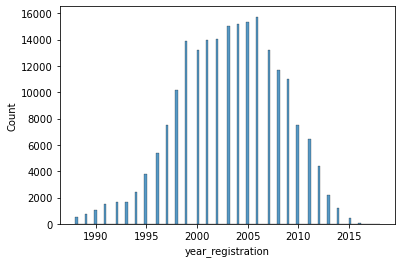

In [1595]:
sns.histplot(df["year_registration"])

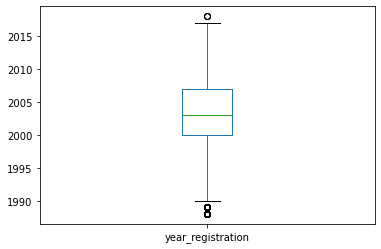

(1988, 2018, (211125, 19))

In [1596]:
#The best optimal threshold is 1987 as cut off
df=df[df["year_registration"]>1987]
#we can decide to drop od cars registered before 1980
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
plot_boxplot(df,"year_registration")
df["year_registration"].min(), df["year_registration"].max(), df.shape,

#df["year_registration"].unique()

/Users/evansrono/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(1988, 2018, (211125, 19))

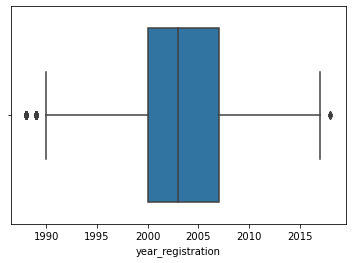

In [1597]:
#confirm or recheck the efeect of removal of outliers on year_registration 
sns.boxplot(df['year_registration'])
df["year_registration"].min(), df["year_registration"].max(), df.shape

<AxesSubplot:xlabel='year_registration', ylabel='Count'>

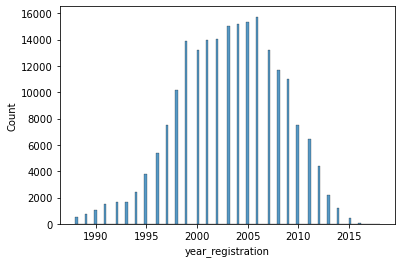

In [1598]:
sns.histplot(df["year_registration"])

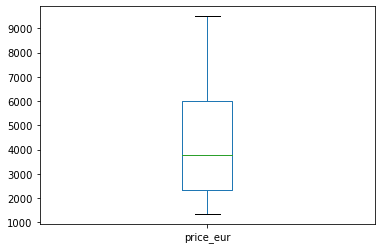

(501, 14650, (211125, 19))

In [1599]:
#This price_eur column is tricky. We have cars that cost zero Euros. We have to think how to deal with this.  Evans tried interquartile range and z score methods later below
def plot_boxplot(df, ft):
    dfa.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
plot_boxplot(df,"price_eur")
df["price_eur"].min(), df["price_eur"].max(), df.shape

/Users/evansrono/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(501, 14650, (211125, 19))

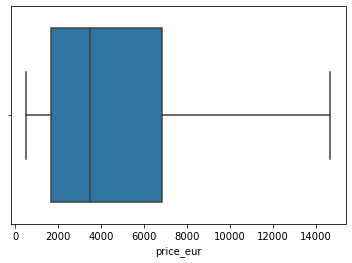

In [1600]:
#price_eur check with seaborn reveal huge effect of outliers
sns.boxplot(df['price_eur'])
df["price_eur"].min(), df["price_eur"].max(), df.shape

<AxesSubplot:xlabel='price_eur', ylabel='Count'>

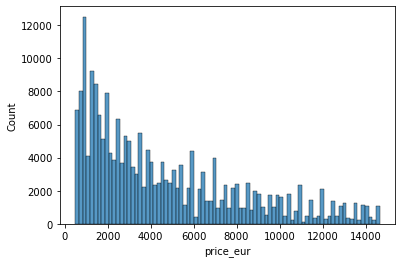

In [1601]:
sns.histplot(df["price_eur"])

/Users/evansrono/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(501, 14650, (211125, 19))

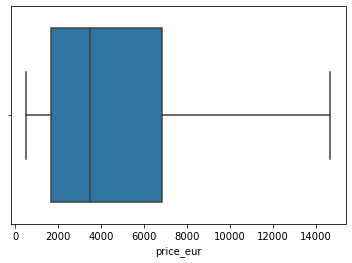

In [1602]:
#The best upper threshold =14666, lower = we choose 500
df=df[df["price_eur"]<14666]
df=df[df["price_eur"]>500]
sns.boxplot(df2['price_eur'])

df["price_eur"].min(), df["price_eur"].max(), df.shape

<AxesSubplot:xlabel='price_eur', ylabel='Count'>

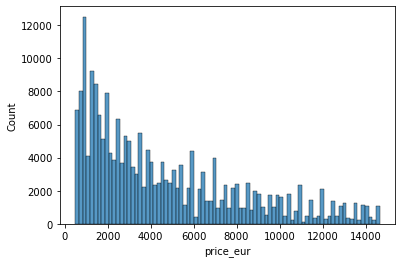

In [1603]:
sns.histplot(df["price_eur"])

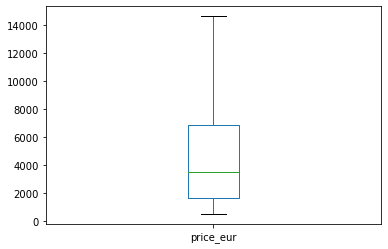

(501, 14650, (211125, 19))

In [1604]:
#Check
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
plot_boxplot(df,"price_eur")
df["price_eur"].min(), df["price_eur"].max(), df.shape

In [1605]:
#Now have a clean file
#we can write it to our directory
df.to_csv("car_cleaned.csv", index=False)

### To find the commonly listed brand

In [1606]:
#Counts the occurence of each unique value

counts = df['brand'].value_counts()

In [1607]:
#  find the most common value (i.e., the value with the highest count)

most_common_value = counts.idxmax()

most_common_value

'volkswagen'

### Distribution of brands?

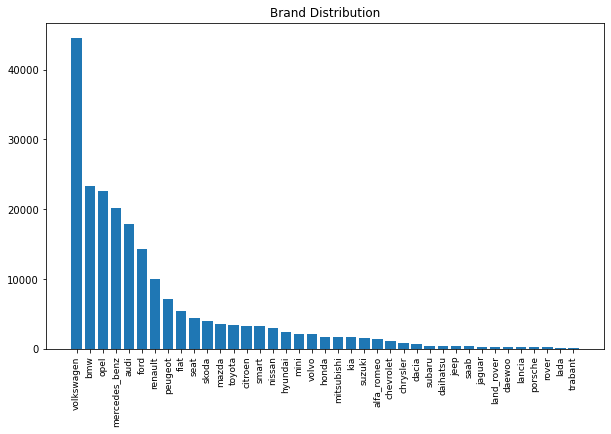

In [1608]:
# create a bar chart of the value counts

plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values, width=0.8)
plt.title("Brand Distribution")  
plt.xticks(rotation=90, size=9) #"vertical"
plt.show()

In [1609]:
#drop missing values
df=df.dropna(subset=["price_eur"])
df

,date_crawled,name,seller,offer_type,price_eur,ab_test,vehicle_type,year_registration,transmission,model,mileage_km,month_registration,fuel_type,brand,unrepaired_damage,date_created,postal_code,last_seen,viewer_index
158436,2016-03-07 13:45:44,Mercedes_Benz_SLK_200_Kompressor_Airscraf/Lede...,private,offer,14650,control,cabrio,2007,manual,slk,90000,5,petrol,mercedes_benz,no,2016-03-07,54338,2016-03-09 14:16:44,2 days 14:16:44
162670,2016-03-27 17:49:03,Ford_Mondeo_Turnier_2.2_TDCi_Titanium_S,private,offer,14650,test,kombi,2012,manual,mondeo,125000,2,diesel,ford,no,2016-03-27,66359,2016-04-05 14:16:06,9 days 14:16:06
282301,2016-03-21 11:55:50,Skoda_Octavia_Combi_2.0_TDI_RS_schwarz_mit_Sta...,private,offer,14650,control,kombi,2010,manual,octavia,100000,8,diesel,skoda,no,2016-03-21,57392,2016-04-06 06:45:38,16 days 06:45:38
153753,2016-03-13 20:06:59,BMW_750i_Voll_F01,private,offer,14650,test,limousine,2009,automatic,7er,150000,7,petrol,bmw,no,2016-03-13,60327,2016-03-14 06:31:22,1 days 06:31:22
305026,2016-03-18 20:43:26,Mercedes_Benz_E_320_CDI_7G_TRONIC_Sportpaket,private,offer,14650,test,limousine,2007,automatic,e_klasse,150000,1,diesel,mercedes_benz,no,2016-03-18,42107,2016-03-22 11:16:58,4 days 11:16:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322874,2016-03-12 20:40:19,Audi_100_Avant_2.0_E,private,offer,510,test,kombi,1991,manual,100,150000,12,petrol,audi,no,2016-03-12,24943,2016-04-05 13:45:13,24 days 13:45:13
251647,2016-03-15 21:55:08,Volkswagen_Vento_1.8_CL,private,offer,510,control,limousine,1995,manual,andere,150000,12,petrol,volkswagen,yes,2016-03-15,99867,2016-04-07 07:17:33,23 days 07:17:33
340568,2016-03-13 16:48:18,escort_16.v_mit_90_ps_faehrt_klasse,private,offer,510,test,limousine,1997,manual,escort,100000,4,petrol,ford,no,2016-03-13,76456,2016-03-17 13:45:40,4 days 13:45:40
150686,2016-03-27 19:56:49,Opel_Astra_Limousine_Garagenwagen_ohne_jeglich...,private,offer,501,control,limousine,1993,automatic,astra,125000,3,petrol,opel,no,2016-03-27,1640,2016-03-27 19:56:49,0 days 19:56:49


<AxesSubplot:xlabel='price_eur', ylabel='Count'>

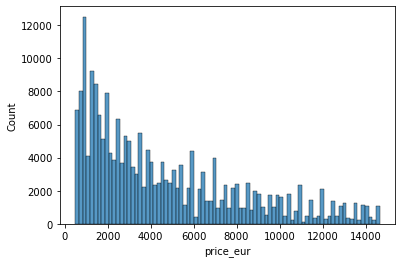

In [1610]:
#outliers
#create a histogram

sns.histplot(df["price_eur"])

In [1611]:
df=df.sort_values(by="price_eur", ascending=False)
#df.dtypes
df

,date_crawled,name,seller,offer_type,price_eur,ab_test,vehicle_type,year_registration,transmission,model,mileage_km,month_registration,fuel_type,brand,unrepaired_damage,date_created,postal_code,last_seen,viewer_index
158436,2016-03-07 13:45:44,Mercedes_Benz_SLK_200_Kompressor_Airscraf/Lede...,private,offer,14650,control,cabrio,2007,manual,slk,90000,5,petrol,mercedes_benz,no,2016-03-07,54338,2016-03-09 14:16:44,2 days 14:16:44
69701,2016-03-14 03:51:24,Volkswagen_Scirocco_1.4_TSI_R_Line,private,offer,14650,test,coupe,2010,manual,scirocco,60000,3,petrol,volkswagen,no,2016-03-13,94315,2016-04-07 04:46:10,25 days 04:46:10
162670,2016-03-27 17:49:03,Ford_Mondeo_Turnier_2.2_TDCi_Titanium_S,private,offer,14650,test,kombi,2012,manual,mondeo,125000,2,diesel,ford,no,2016-03-27,66359,2016-04-05 14:16:06,9 days 14:16:06
363176,2016-03-14 13:57:35,BMW_130i_mit_Navi__Xenon__M_Paket,private,offer,14650,test,limousine,2006,manual,1er,125000,7,petrol,bmw,no,2016-03-14,23560,2016-03-23 14:46:56,9 days 14:46:56
51968,2016-03-10 11:46:54,BMW_330i,private,offer,14650,test,limousine,2006,manual,3er,150000,5,petrol,bmw,no,2016-03-10,80634,2016-04-01 05:17:29,22 days 05:17:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322874,2016-03-12 20:40:19,Audi_100_Avant_2.0_E,private,offer,510,test,kombi,1991,manual,100,150000,12,petrol,audi,no,2016-03-12,24943,2016-04-05 13:45:13,24 days 13:45:13
251647,2016-03-15 21:55:08,Volkswagen_Vento_1.8_CL,private,offer,510,control,limousine,1995,manual,andere,150000,12,petrol,volkswagen,yes,2016-03-15,99867,2016-04-07 07:17:33,23 days 07:17:33
340568,2016-03-13 16:48:18,escort_16.v_mit_90_ps_faehrt_klasse,private,offer,510,test,limousine,1997,manual,escort,100000,4,petrol,ford,no,2016-03-13,76456,2016-03-17 13:45:40,4 days 13:45:40
150686,2016-03-27 19:56:49,Opel_Astra_Limousine_Garagenwagen_ohne_jeglich...,private,offer,501,control,limousine,1993,automatic,astra,125000,3,petrol,opel,no,2016-03-27,1640,2016-03-27 19:56:49,0 days 19:56:49


<AxesSubplot:xlabel='year_registration', ylabel='Count'>

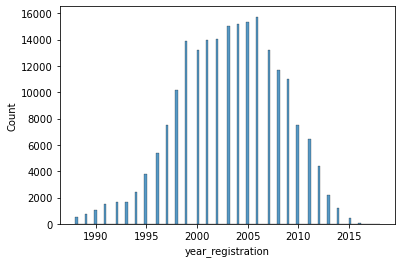

In [1612]:
#outliers
#create a histogram

sns.histplot(df["year_registration"])

In [1613]:
#outliers
#create a histogram

#sns.histplot(df["power_hp"])#dropped

<AxesSubplot:xlabel='mileage_km', ylabel='Count'>

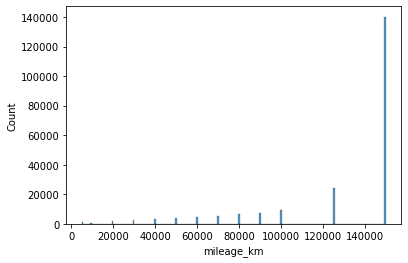

In [1614]:
#outliers
#create a histogram
sns.histplot(df["mileage_km"])

In [1615]:
df

,date_crawled,name,seller,offer_type,price_eur,ab_test,vehicle_type,year_registration,transmission,model,mileage_km,month_registration,fuel_type,brand,unrepaired_damage,date_created,postal_code,last_seen,viewer_index
158436,2016-03-07 13:45:44,Mercedes_Benz_SLK_200_Kompressor_Airscraf/Lede...,private,offer,14650,control,cabrio,2007,manual,slk,90000,5,petrol,mercedes_benz,no,2016-03-07,54338,2016-03-09 14:16:44,2 days 14:16:44
69701,2016-03-14 03:51:24,Volkswagen_Scirocco_1.4_TSI_R_Line,private,offer,14650,test,coupe,2010,manual,scirocco,60000,3,petrol,volkswagen,no,2016-03-13,94315,2016-04-07 04:46:10,25 days 04:46:10
162670,2016-03-27 17:49:03,Ford_Mondeo_Turnier_2.2_TDCi_Titanium_S,private,offer,14650,test,kombi,2012,manual,mondeo,125000,2,diesel,ford,no,2016-03-27,66359,2016-04-05 14:16:06,9 days 14:16:06
363176,2016-03-14 13:57:35,BMW_130i_mit_Navi__Xenon__M_Paket,private,offer,14650,test,limousine,2006,manual,1er,125000,7,petrol,bmw,no,2016-03-14,23560,2016-03-23 14:46:56,9 days 14:46:56
51968,2016-03-10 11:46:54,BMW_330i,private,offer,14650,test,limousine,2006,manual,3er,150000,5,petrol,bmw,no,2016-03-10,80634,2016-04-01 05:17:29,22 days 05:17:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322874,2016-03-12 20:40:19,Audi_100_Avant_2.0_E,private,offer,510,test,kombi,1991,manual,100,150000,12,petrol,audi,no,2016-03-12,24943,2016-04-05 13:45:13,24 days 13:45:13
251647,2016-03-15 21:55:08,Volkswagen_Vento_1.8_CL,private,offer,510,control,limousine,1995,manual,andere,150000,12,petrol,volkswagen,yes,2016-03-15,99867,2016-04-07 07:17:33,23 days 07:17:33
340568,2016-03-13 16:48:18,escort_16.v_mit_90_ps_faehrt_klasse,private,offer,510,test,limousine,1997,manual,escort,100000,4,petrol,ford,no,2016-03-13,76456,2016-03-17 13:45:40,4 days 13:45:40
150686,2016-03-27 19:56:49,Opel_Astra_Limousine_Garagenwagen_ohne_jeglich...,private,offer,501,control,limousine,1993,automatic,astra,125000,3,petrol,opel,no,2016-03-27,1640,2016-03-27 19:56:49,0 days 19:56:49


<AxesSubplot:xlabel='mileage_km', ylabel='Count'>

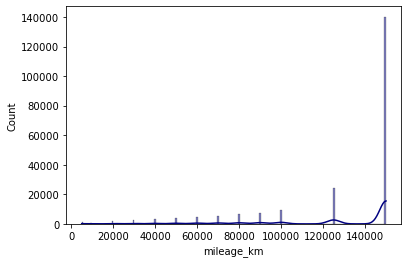

In [1616]:
sns.histplot(df['mileage_km']
           ,color = 'navy'
            ,kde = True
            )

<AxesSubplot:xlabel='month_registration', ylabel='Count'>

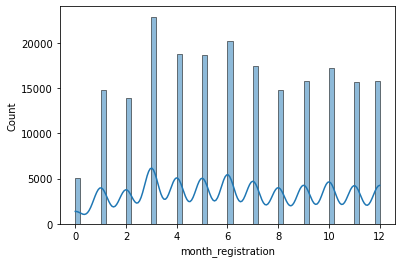

In [1617]:
#outliers
#create a histogram
sns.histplot(df["month_registration"],kde = True)##be categorical

### Price variation between: relatively newer cars and older cars

In [1618]:
df['fuel_type'].unique()

array(['petrol', 'diesel', 'lpg', 'elektric', 'cng', 'other', 'hybrid'],
      dtype=object)

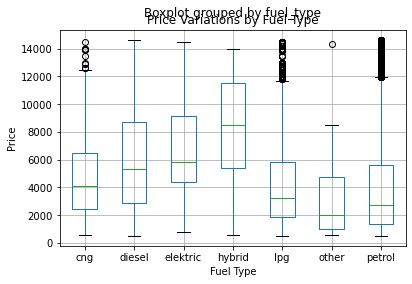

In [1619]:
df.boxplot(column='price_eur', by='fuel_type')

# set the chart title and axis labels
plt.title('Price Variations by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')

# display the chart
plt.show()


#mean_prices = df.groupby('fuel_type')['price_eur'].mean()

# create a bar chart of the mean prices for each fuel type
#plt.bar(mean_prices.index, mean_prices.values)

# set the chart title and axis labels
#plt.title("Mean Price by Fuel Type")
#plt.xlabel("Fuel Type")
#plt.ylabel("Price")

# display the chart
#plt.show()

### Price variation between transmission type and prices

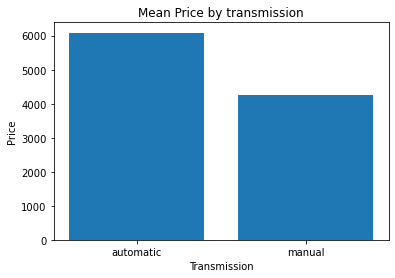

In [1620]:
mean_prices = df.groupby('transmission')['price_eur'].mean()

# create a bar chart of the mean prices for each fuel type
plt.bar(mean_prices.index, mean_prices.values)

# set the chart title and axis labels
plt.title("Mean Price by transmission")
plt.xlabel("Transmission")
plt.ylabel("Price")

# display the chart
plt.show()


In [1621]:
df.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price_eur', 'ab_test',
       'vehicle_type', 'year_registration', 'transmission', 'model',
       'mileage_km', 'month_registration', 'fuel_type', 'brand',
       'unrepaired_damage', 'date_created', 'postal_code', 'last_seen',
       'viewer_index'],
      dtype='object')

### Price variation between transmission type and prices

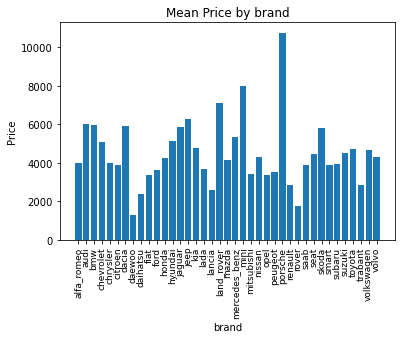

In [1622]:
mean_prices = df.groupby('brand')['price_eur'].mean()

# create a bar chart of the mean prices for each fuel type
plt.bar(mean_prices.index, mean_prices.values)

# set the chart title and axis labels
plt.title("Mean Price by brand")
plt.xlabel("brand")
plt.ylabel("Price")
plt.xticks(rotation="vertical", size=9) 

# display the chart
plt.show()

### Price variation between car mileage and prices

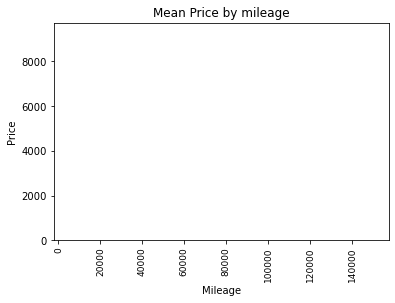

In [1623]:
mean_prices = df.groupby('mileage_km')['price_eur'].mean()

# create a bar chart of the mean prices for each fuel type
plt.bar(mean_prices.index, mean_prices.values)

# set the chart title and axis labels
plt.title("Mean Price by mileage")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.xticks(rotation="vertical", size=9) 

# display the chart
plt.show()

### Price variation between unrepaired_damage and prices

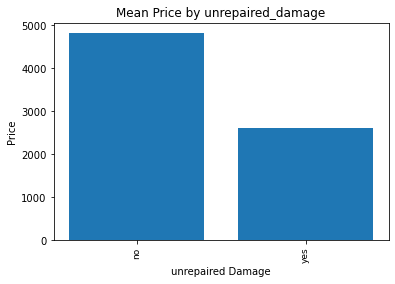

In [1624]:
mean_prices = df.groupby('unrepaired_damage')['price_eur'].mean()

# create a bar chart of the mean prices for each fuel type
plt.bar(mean_prices.index, mean_prices.values)

# set the chart title and axis labels
plt.title("Mean Price by unrepaired_damage")
plt.xlabel("unrepaired Damage")
plt.ylabel("Price")
plt.xticks(rotation="vertical", size=9) 

# display the chart
plt.show()

### Correlation between numerical features

In [1625]:
#numericals
numericals=df.select_dtypes(include = np.number)
numericals

,price_eur,year_registration,mileage_km,month_registration,postal_code,viewer_index
158436,14650,2007,90000,5,54338,2 days 14:16:44
69701,14650,2010,60000,3,94315,25 days 04:46:10
162670,14650,2012,125000,2,66359,9 days 14:16:06
363176,14650,2006,125000,7,23560,9 days 14:46:56
51968,14650,2006,150000,5,80634,22 days 05:17:29
...,...,...,...,...,...,...
322874,510,1991,150000,12,24943,24 days 13:45:13
251647,510,1995,150000,12,99867,23 days 07:17:33
340568,510,1997,100000,4,76456,4 days 13:45:40
150686,501,1993,125000,3,1640,0 days 19:56:49


In [1626]:
numericals.drop('viewer_index', axis=1, inplace=True)
numericals.drop('postal_code', axis=1, inplace=True)
#numericals.drop('power_hp', axis=1, inplace=True)
numericals

,price_eur,year_registration,mileage_km,month_registration
158436,14650,2007,90000,5
69701,14650,2010,60000,3
162670,14650,2012,125000,2
363176,14650,2006,125000,7
51968,14650,2006,150000,5
...,...,...,...,...
322874,510,1991,150000,12
251647,510,1995,150000,12
340568,510,1997,100000,4
150686,501,1993,125000,3


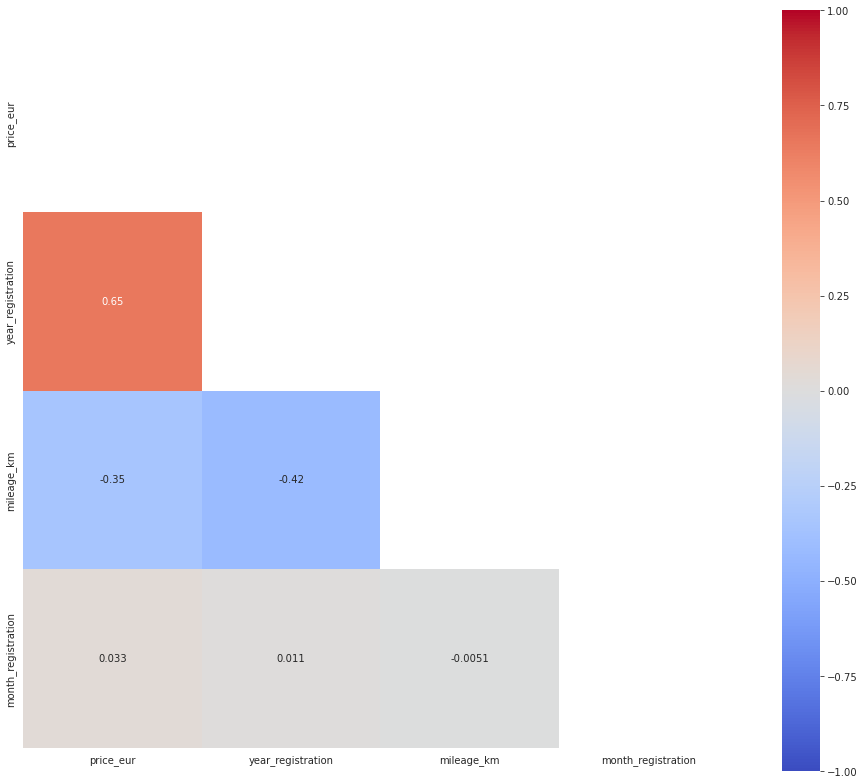

In [1627]:
corr =numericals.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True # trick to filter out the upper-right triangle, which is redundant due to symmetry
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 14))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

# Data Analytics and Conclusion

## Data Cleaning<br>

1. **What was done?** <br>
EDA?<br> Data cleaning? <br> Missing values? <br> Duplicates?<br> outliers<br> columns to drop<br>

1. **How was it done?** <br> 
1. **Results Summary**<br>

## Exploration Data Analyses<br>
1. **EDA and summary of dataset**<br>
Mean prices<br> max prices <br>
mode i.e most frequent car model<br>
1. **Results Summary**<br>

1. **Underlying patterns and data structure:**<br>
Commonly listed brands<br>
Brand distribution? <br> Newer and older cars?<br> fuel type?<br> transmission type?<br> mean prices?<br> most frequent brand?<br>mileage of the car<br> unrepaired_damage?

1. **Any correlations?** <br> Numerical features: <br> Price?<br> power_hp?<br> mileage in Km?<br>
1. **Results Summary**<br>

## Business Intelligence<br>
1. **Ab Testing on viewership of the cars?** <br>

1. **Final Design of a Tableau Dashboard and take home message?** <br>
1. **Results Summary**<br>

## Conclusions<br>
1. **Bigger picture**<br>
1. **Recommendations**<br>
1. **Summary**<br>
1. **Results Summary**<br>


In [ ]:
#code
#Do data cleaning


In [ ]:
#code
#EDA and provide summary into the dataset

In [ ]:
#code

In [ ]:
#code

In [ ]:
#code

# Evans is my project partner

# References
1. https://www.kaggle.com/datasets/shaunoilund/auto-sales-ebay-germany-random-50k-cleaned